In [1]:
#指导教师：宋陆军教师
#参考资料：基于python的金融分析与风险管理-斯文
#          风险管理与金融机构赫尔

In [2]:
import numpy as  np #导入numpy模块
import pandas as pd #导入pandas模块
import scipy #导入scipy 统计模块
import matplotlib.pyplot as plt #导入pyplot模块
from pylab import mpl #导入mpl模块
# mpl.rcParams["font.sans-serif"] = ["simehei"]
# mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False

In [3]:
def Vega_option(S,K,sigma,r,T):
    import numpy as np
    d1 = (np.log(S/K)+(r+pow(sigma,2)/2*T))/(sigma*np.sqrt(T))
    return S*np.sqrt(T)*np.exp(-pow(d1,2)/2)/np.sqrt(2*np.pi)

In [4]:
vega = Vega_option(S=5,K=6,sigma=0.24,r=0.04,T=0.5)

In [5]:
vega

1.0616559160631236

In [6]:
vega50ETF = Vega_option(S=3.24,K=3.3,sigma=0.19,r=0.03,T=0.075)

In [7]:
vega50ETF 

0.34310095893405324

In [8]:
S_list = np.linspace(2.75,3.7,500)
Vega_list = Vega_option(S=S_list,K=3.3,sigma=0.19,r=0.03,T=0.075)

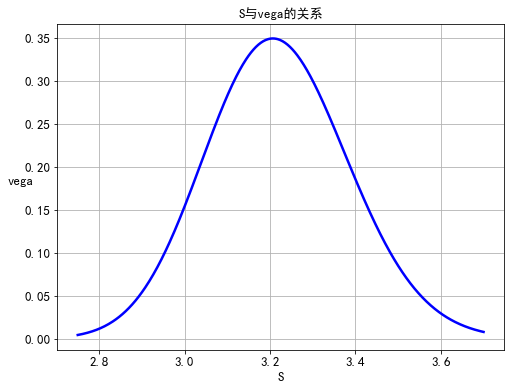

In [9]:
plt.figure(figsize=(8,6)) 
plt.plot(S_list,Vega_list,"b-",lw=2.5)
plt.xlabel(u"S",fontsize=13)
plt.ylabel(u'vega',fontsize=13,rotation = 0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'S与vega的关系',fontsize=13)
plt.grid('True')
plt.show()

In [10]:
T_list = np.linspace(0.014,0.14,500)
Vega_list = Vega_option(S=3.24,K=3.3,sigma=0.19,r=0.03,T=T_list)

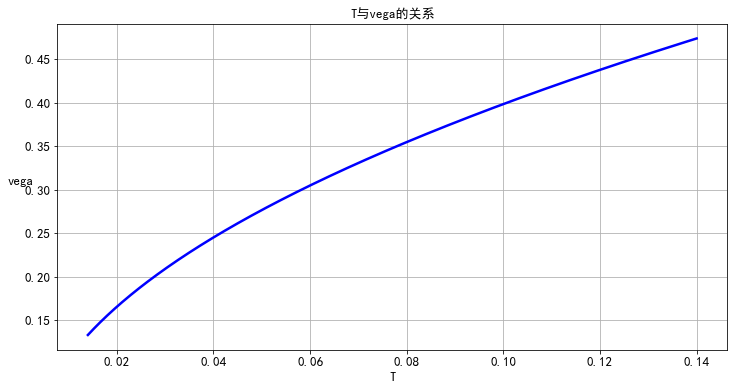

In [11]:
plt.figure(figsize=(12,6)) 
plt.plot(T_list,Vega_list,"b-",lw=2.5)
plt.xlabel(u"T",fontsize=13)
plt.ylabel(u'vega',fontsize=13,rotation = 0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'T与vega的关系',fontsize=13)
plt.grid('True')
plt.show()

In [12]:
T_list = np.linspace(0.014,0.14,500)
Vega_list2 = Vega_option(S=3.24,K=3.3,sigma=0.19,r=0.03,T=T_list)
Vega_list3 = Vega_option(S=3.3,K=3.3,sigma=0.19,r=0.03,T=T_list)
Vega_list4 = Vega_option(S=3.4,K=3.3,sigma=0.19,r=0.03,T=T_list)

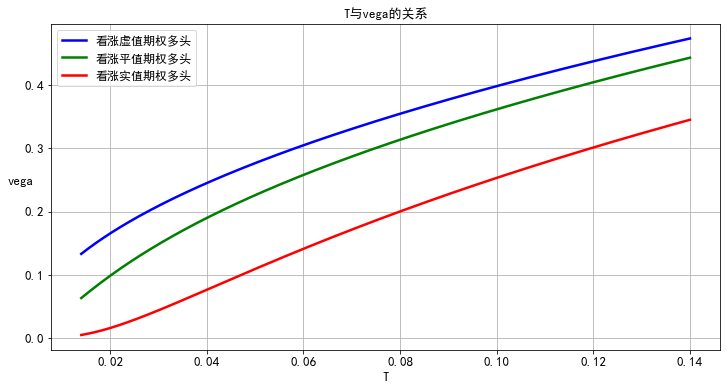

In [13]:
plt.figure(figsize=(12,6)) 
plt.plot(T_list,Vega_list2,"b-",label=u'看涨虚值期权多头',lw=2.5)
plt.plot(T_list,Vega_list3,"g-",label=u'看涨平值期权多头',lw=2.5)
plt.plot(T_list,Vega_list4,"r-",label=u'看涨实值期权多头',lw=2.5)
plt.xlabel(u"T",fontsize=13)
plt.ylabel(u'vega',fontsize=13,rotation = 0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'T与vega的关系',fontsize=13)
plt.legend(fontsize=12)
plt.grid('True')
plt.show()

In [14]:
def rho_c(S,K,sigma,r,T):
    import numpy as np
    from scipy.stats import norm
    d1 = (np.log(S/K)+(r+pow(sigma,2)/2*T))/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return K*T*np.exp(-r*T)*norm.cdf(d2)

In [15]:
def rho_p(S,K,sigma,r,T):
    import numpy as np
    from scipy.stats import norm
    d1 = (np.log(S/K)+(r+pow(sigma,2)/2*T))/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return -K*T*np.exp(-r*T)*norm.cdf(-d2)

In [16]:
rho50ETF = rho_p(S=3.24,K=3.3,sigma=0.19,r=0.03,T=0.075)

In [17]:
rho50ETF

-0.10410265916992813

In [18]:
K_list = np.linspace(2.85,3.7,500)
rho_listc = rho_c(S=3.24,K=K_list,sigma=0.19,r=0.03,T=0.075)
rho_listp = rho_p(S=3.24,K=K_list,sigma=0.19,r=0.03,T=0.075)


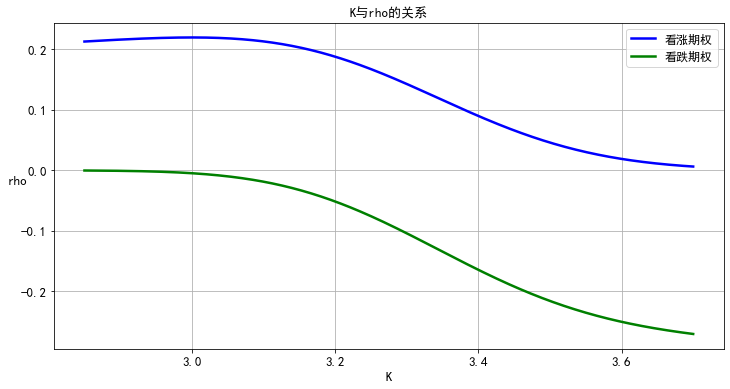

In [19]:
plt.figure(figsize=(12,6)) 
plt.plot(K_list,rho_listc,"b-",label=u'看涨期权',lw=2.5)
plt.plot(K_list,rho_listp,"g-",label=u'看跌期权',lw=2.5)
plt.xlabel(u"K",fontsize=13)
plt.ylabel(u'rho',fontsize=13,rotation = 0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'K与rho的关系',fontsize=13)
plt.legend(fontsize=12)
plt.grid('True')
plt.show()

In [20]:
S_list = np.linspace(2.85,3.7,500)
rho_listc = rho_c(S=S_list,K=3.3,sigma=0.19,r=0.03,T=0.075)
rho_listp = rho_p(S=S_list,K=3.3,sigma=0.19,r=0.03,T=0.075)

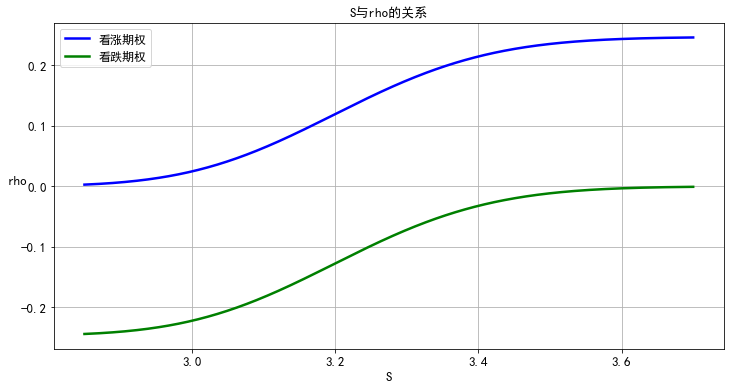

In [21]:
plt.figure(figsize=(12,6)) 
plt.plot(S_list,rho_listc,"b-",label=u'看涨期权',lw=2.5)
plt.plot(S_list,rho_listp,"g-",label=u'看跌期权',lw=2.5)
plt.xlabel(u"S",fontsize=13)
plt.ylabel(u'rho',fontsize=13,rotation = 0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'S与rho的关系',fontsize=13)
plt.legend(fontsize=12)
plt.grid('True')
plt.show()

In [22]:
T_list = np.linspace(0.014,0.14,500)
rho_listc2 = rho_c(S=3.24,K=3.3,sigma=0.19,r=0.03,T=T_list)
rho_listp2 = rho_p(S=3.24,K=3.3,sigma=0.19,r=0.03,T=T_list)

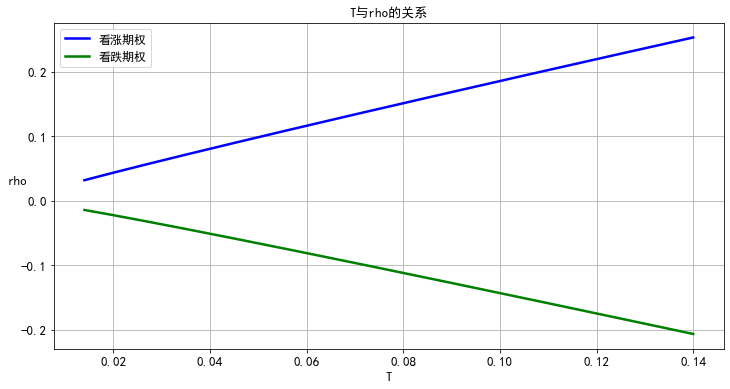

In [23]:
plt.figure(figsize=(12,6)) 
plt.plot(T_list,rho_listc2,"b-",label=u'看涨期权',lw=2.5)
plt.plot(T_list,rho_listp2,"g-",label=u'看跌期权',lw=2.5)
plt.xlabel(u"T",fontsize=13)
plt.ylabel(u'rho',fontsize=13,rotation = 0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'T与rho的关系',fontsize=13)
plt.legend(fontsize=12)
plt.grid('True')
plt.show()

In [24]:
T_list = np.linspace(0.014,0.14,500)
rho_listc3 = rho_c(S=3.1,K=3.3,sigma=0.19,r=0.03,T=T_list)
rho_listc4 = rho_c(S=3.3,K=3.3,sigma=0.19,r=0.03,T=T_list)
rho_listc5 = rho_c(S=3.5,K=3.3,sigma=0.19,r=0.03,T=T_list)

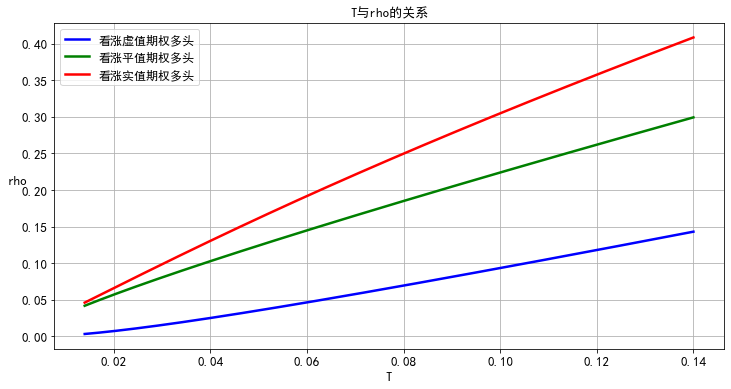

In [25]:
plt.figure(figsize=(12,6)) 
plt.plot(T_list,rho_listc3 ,"b-",label=u'看涨虚值期权多头',lw=2.5)
plt.plot(T_list,rho_listc4 ,"g-",label=u'看涨平值期权多头',lw=2.5)
plt.plot(T_list,rho_listc5 ,"r-",label=u'看涨实值期权多头',lw=2.5)
plt.xlabel(u"T",fontsize=13)
plt.ylabel(u'rho',fontsize=13,rotation = 0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'T与rho的关系',fontsize=13)
plt.legend(fontsize=12)
plt.grid('True')
plt.show()

In [26]:
T_list = np.linspace(0.014,0.14,500)
rho_listp3 = rho_p(S=3.1,K=3.3,sigma=0.19,r=0.03,T=T_list)
rho_listp4 = rho_p(S=3.3,K=3.3,sigma=0.19,r=0.03,T=T_list)
rho_listp5 = rho_p(S=3.5,K=3.3,sigma=0.19,r=0.03,T=T_list)

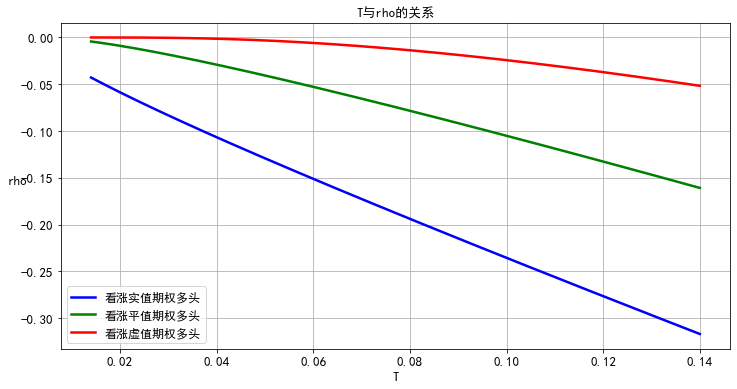

In [27]:
plt.figure(figsize=(12,6)) 
plt.plot(T_list,rho_listp3 ,"b-",label=u'看涨实值期权多头',lw=2.5)
plt.plot(T_list,rho_listp4 ,"g-",label=u'看涨平值期权多头',lw=2.5)
plt.plot(T_list,rho_listp5 ,"r-",label=u'看涨虚值期权多头',lw=2.5)
plt.xlabel(u"T",fontsize=13)
plt.ylabel(u'rho',fontsize=13,rotation = 0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'T与rho的关系',fontsize=13)
plt.legend(fontsize=12)
plt.grid('True')
plt.show()